Video games data analysis

In [155]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and display its information
df = pd.read_csv('vgsales.csv')

info = df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Data cleaning and preparation

In [156]:
# Check missing values in the dataset
print(f'Total Missing Values per Column:\n{df.isnull().sum().sort_values(ascending=False)}\n') 

# Remove rows with missing values
df_cleaned = df.dropna()

# Cheking the cleaned dataset for missing values
print(f'Total Missing Values after Cleaning:\n{df_cleaned.isnull().sum().sort_values(ascending=False)}')

# Removing duplicate rows
print(f'Total Rows before Removing Duplicates: {len(df_cleaned)}\n')
df_cleaned = df_cleaned.drop_duplicates()
print(f'Total Rows after Removing Duplicates: {len(df_cleaned)}\n')

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Changing year column to integer type
df_cleaned['Year'] = df_cleaned['Year'].astype('Int64')

# Removing missing values and duplicate columns is essential to make ready the dataset, so now we can proceed with further analysis and visualization.
df_cleaned 

Total Missing Values per Column:
Year            271
Publisher        58
Rank              0
Platform          0
Name              0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Total Missing Values after Cleaning:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Total Rows before Removing Duplicates: 16291

Total Rows after Removing Duplicates: 16291



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Let's start our analysis

Top 10 video games by selling

C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\2898881886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Global_Sales', data=top_10_sales, palette='summer', ax=ax1)
C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\2898881886.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


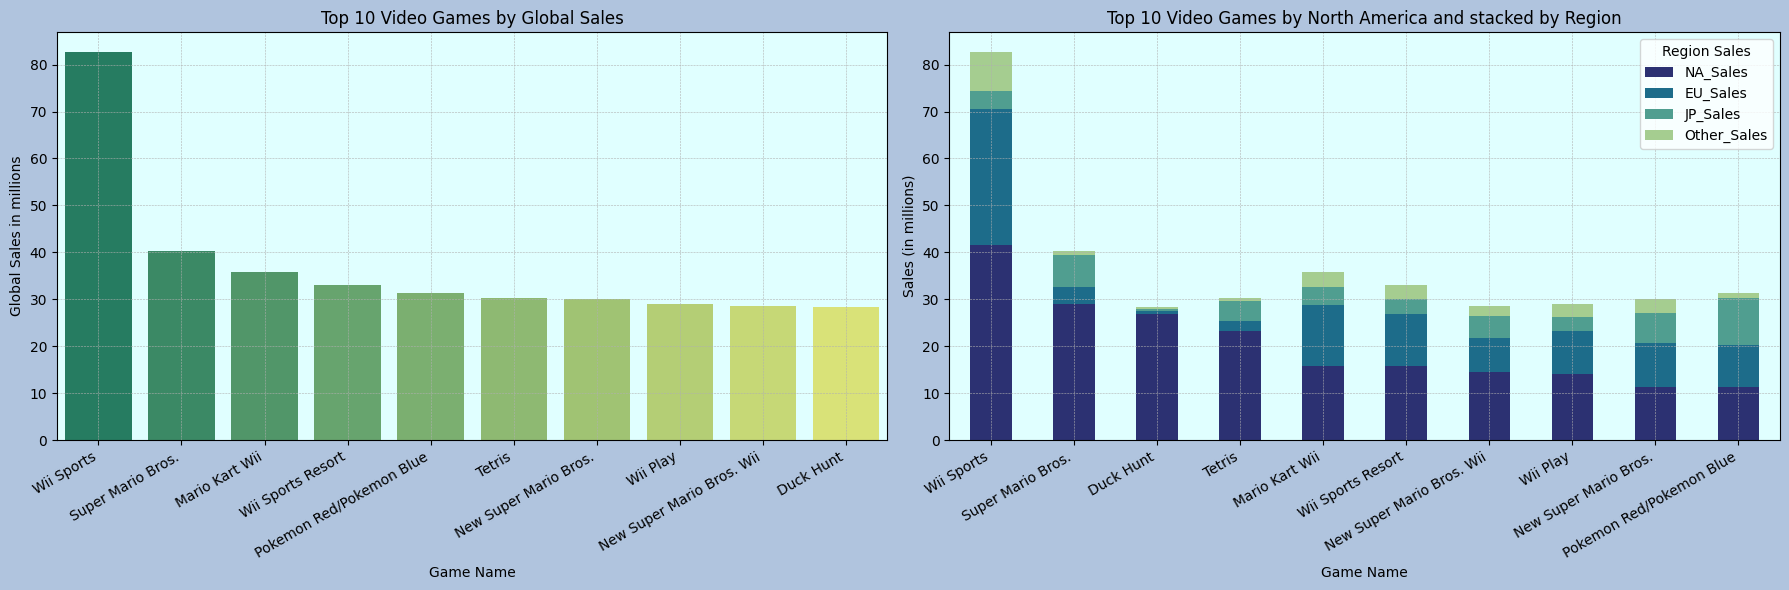

The top sellest video game is 'Wii Sports' with global sales of 82.74 million units.



In [157]:
# Crearing visualizations to analyze the video game sales data
fig = plt.figure(figsize=(18, 6))
fig.patch.set_facecolor('lightsteelblue')

# Creating a bar plot for the top 10 video games by global sales
top_10_sales = df_cleaned.nlargest(10, 'Global_Sales')
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Name', y='Global_Sales', data=top_10_sales, palette='summer', ax=ax1)
ax1.set_title('Top 10 Video Games by Global Sales')
ax1.set_xlabel('Game Name')
ax1.set_ylabel('Global Sales in millions')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.grid(axis='y', linestyle='--', linewidth=0.4)
ax1.grid(axis='x', linestyle='--', linewidth=0.4)
ax1.patch.set_facecolor('lightcyan')

# Creating a stacked bar plot for the top 10 video games by global sales and by region
stacked_data = top_10_sales.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().nlargest(10, 'NA_Sales')
stacked_data = stacked_data.sort_values(by='NA_Sales',ascending=False)
ax2 = plt.subplot(1, 2, 2)
stacked_data.plot(kind='bar', stacked=True, colormap='crest_r', ax=ax2)
ax2.set_title('Top 10 Video Games by North America and stacked by Region')
ax2.set_xlabel('Game Name')
ax2.set_ylabel('Sales (in millions)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax2.legend(title='Region Sales')
ax2.grid(axis='y', linestyle='--', linewidth=0.4)
ax2.grid(axis='x', linestyle='--', linewidth=0.4)
ax2.patch.set_facecolor('lightcyan')

plt.tight_layout()
plt.show()

print(f"The top sellest video game is '{top_10_sales.iloc[0]['Name']}' with global sales of {top_10_sales.iloc[0]['Global_Sales']} million units.\n")

In [158]:
# Creating a table of top 10 video game publishers by global sales with region sales
stacked_data = top_10_sales.set_index('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
print("Table of top 10 video games by global sales with region sales:")
stacked_data

Table of top 10 video games by global sales with region sales:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
Tetris,23.20,2.26,4.22,0.58,30.26
New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01
Wii Play,14.03,9.20,2.93,2.85,29.02
New Super Mario Bros. Wii,14.59,7.06,4.70,2.26,28.62


In [159]:
# Calculating the percentage of sales by region relative to global sales
stacked_data_percentage = stacked_data.div(stacked_data['Global_Sales'], axis=0) * 100
stacked_data_percentage['Global_Sales'] = stacked_data_percentage['Global_Sales'].astype('Int64')
stacked_data_percentage = stacked_data_percentage.round(2)

# Formatting the percentage values for better readability
for col in stacked_data_percentage.columns:
    stacked_data_percentage[col] = stacked_data_percentage[col].astype(str) + '%'

print("Table of top 10 video games by global sales with region sales by percentage:")
stacked_data_percentage


Table of top 10 video games by global sales with region sales by percentage:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,
Wii Sports,50.15%,35.07%,4.56%,10.22%,100%
Super Mario Bros.,72.27%,8.9%,16.92%,1.91%,100%
Mario Kart Wii,44.25%,35.96%,10.58%,9.24%,100%
Wii Sports Resort,47.73%,33.36%,9.94%,8.97%,100%
Pokemon Red/Pokemon Blue,35.93%,28.34%,32.58%,3.19%,100%
Tetris,76.67%,7.47%,13.95%,1.92%,100%
New Super Mario Bros.,37.92%,30.76%,21.66%,9.66%,100%
Wii Play,48.35%,31.7%,10.1%,9.82%,100%
New Super Mario Bros. Wii,50.98%,24.67%,16.42%,7.9%,100%


Top 10 video games by publisher

C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\347118330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Global_Sales', data=top_publishers, palette='viridis', ax=ax1)
C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\347118330.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


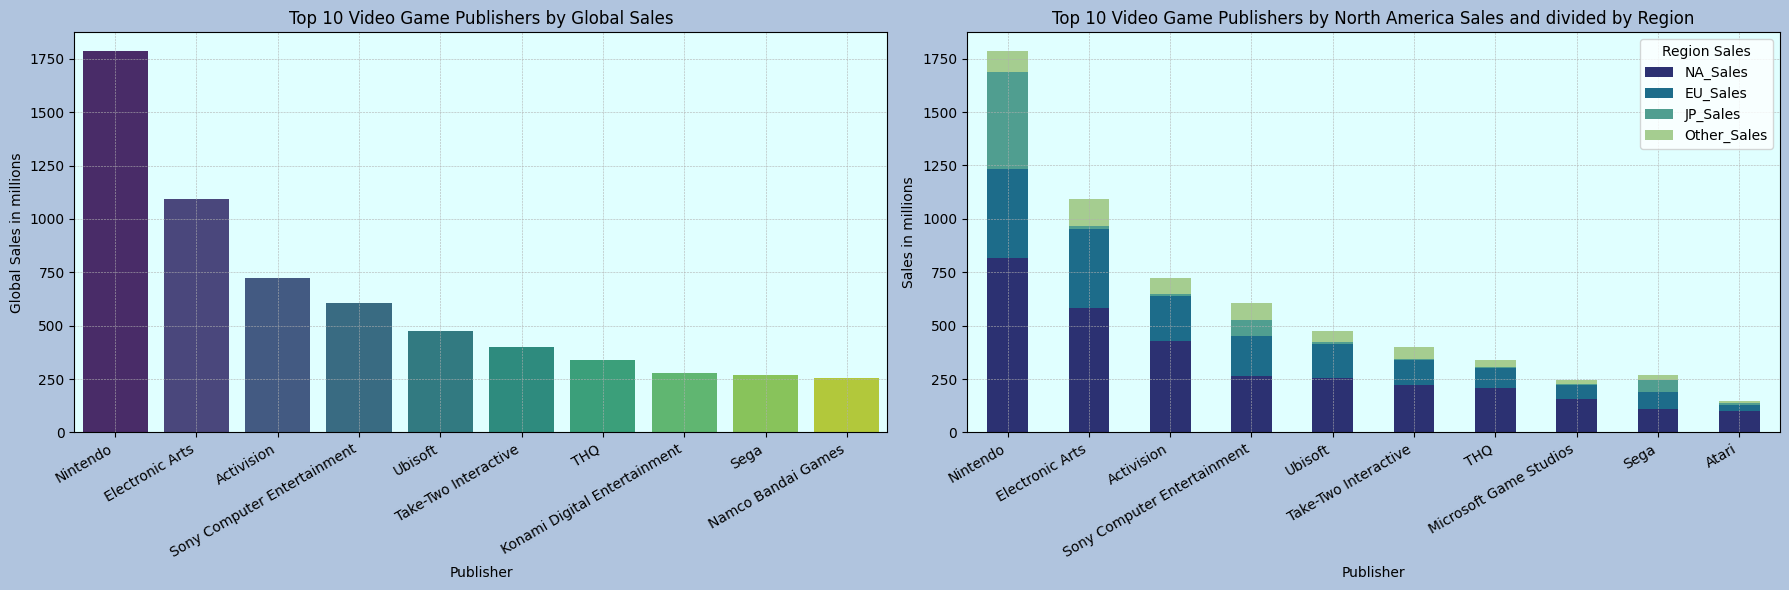

The top publisher is 'Nintendo' with global sales of 1784.43 million units.



In [160]:
# Top Publisher Analysis
top_publishers = df_cleaned.groupby('Publisher')['Global_Sales'].sum().nlargest(10).reset_index()
top_publishers = top_publishers.sort_values(by='Global_Sales', ascending=False)

fig = plt.figure(figsize=(18, 6))
fig.patch.set_facecolor('lightsteelblue')
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Publisher', y='Global_Sales', data=top_publishers, palette='viridis', ax=ax1)
ax1.set_title('Top 10 Video Game Publishers by Global Sales')
ax1.set_xlabel('Publisher')
ax1.set_ylabel('Global Sales in millions')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.grid(axis='y', linestyle='--', linewidth=0.4)
ax1.grid(axis='x', linestyle='--', linewidth=0.4)
ax1.patch.set_facecolor('lightcyan')

# Creating a stacked bar plot for the top 10 publishers by North America and by region
stacked_publishers = df_cleaned.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().nlargest(10, 'NA_Sales')
stacked_publishers = stacked_publishers.sort_values(by='NA_Sales', ascending=False)

ax2 = plt.subplot(1, 2, 2)
stacked_publishers.plot(kind='bar', stacked=True, colormap='crest_r', ax=ax2)
ax2.set_title('Top 10 Video Game Publishers by North America Sales and divided by Region')
ax2.set_xlabel('Publisher')
ax2.set_ylabel('Sales in millions')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax2.legend(title='Region Sales')
ax2.grid(axis='y', linestyle='--', linewidth=0.4)
ax2.grid(axis='x', linestyle='--', linewidth=0.4)
ax2.patch.set_facecolor('lightcyan')

plt.tight_layout()
plt.show()

print(f"The top publisher is '{top_publishers.iloc[0]['Publisher']}' with global sales of {top_publishers.iloc[0]['Global_Sales']} million units.\n")



In [161]:
# Creating a table of top 10 video game publishers by global sales with region sales
stacked_publishers["Global_Sales"] = stacked_publishers["NA_Sales"] + stacked_publishers["EU_Sales"] + stacked_publishers["JP_Sales"] + stacked_publishers["Other_Sales"]
stacked_publishers = stacked_publishers.sort_values(by='Global_Sales', ascending=False)
print("Table of top 10 video game publishers by global sales with region sales:")
stacked_publishers

Table of top 10 video game publishers by global sales with region sales:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.23
Electronic Arts,584.22,367.38,13.98,127.63,1093.21
Activision,426.01,213.72,6.54,74.79,721.06
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.27
Ubisoft,252.81,163.03,7.33,50.16,473.33
Take-Two Interactive,220.47,117.95,5.83,55.20,399.45
THQ,208.60,94.60,5.01,32.11,340.32
Sega,108.78,81.41,56.19,24.30,270.68
Microsoft Game Studios,155.35,68.61,3.26,18.56,245.78


In [170]:
# Calculating the percentage of sales by region relative to global sales
stacked_publishers_percentage = stacked_publishers.div(stacked_publishers['Global_Sales'], axis=0) * 100
stacked_publishers_percentage['Global_Sales'] = stacked_publishers_percentage['Global_Sales'].astype('Int64')
stacked_publishers_percentage = stacked_publishers_percentage.round(2)

# Formatting the percentage values for better readability
for col in stacked_publishers_percentage.columns:
    stacked_publishers_percentage[col] = stacked_publishers_percentage[col].astype(str) + '%'
print("Table of top 10 video game publishers by global sales with region sales by percentage:")
stacked_publishers_percentage


Table of top 10 video game publishers by global sales with region sales by percentage:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,45.72%,23.44%,25.5%,5.34%,100%
Electronic Arts,53.44%,33.61%,1.28%,11.67%,100%
Activision,59.08%,29.64%,0.91%,10.37%,100%
Sony Computer Entertainment,43.67%,30.88%,12.2%,13.24%,100%
Ubisoft,53.41%,34.44%,1.55%,10.6%,100%
Take-Two Interactive,55.19%,29.53%,1.46%,13.82%,100%
THQ,61.3%,27.8%,1.47%,9.44%,100%
Sega,40.19%,30.08%,20.76%,8.98%,100%
Microsoft Game Studios,63.21%,27.92%,1.33%,7.55%,100%


Top 10 video games by publisher

C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\4196449864.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Global_Sales', data=top_platforms, palette='plasma', ax=ax1)
C:\Users\Stefano\AppData\Local\Temp\ipykernel_20408\4196449864.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_platforms['Platform'], rotation=30, ha='right')


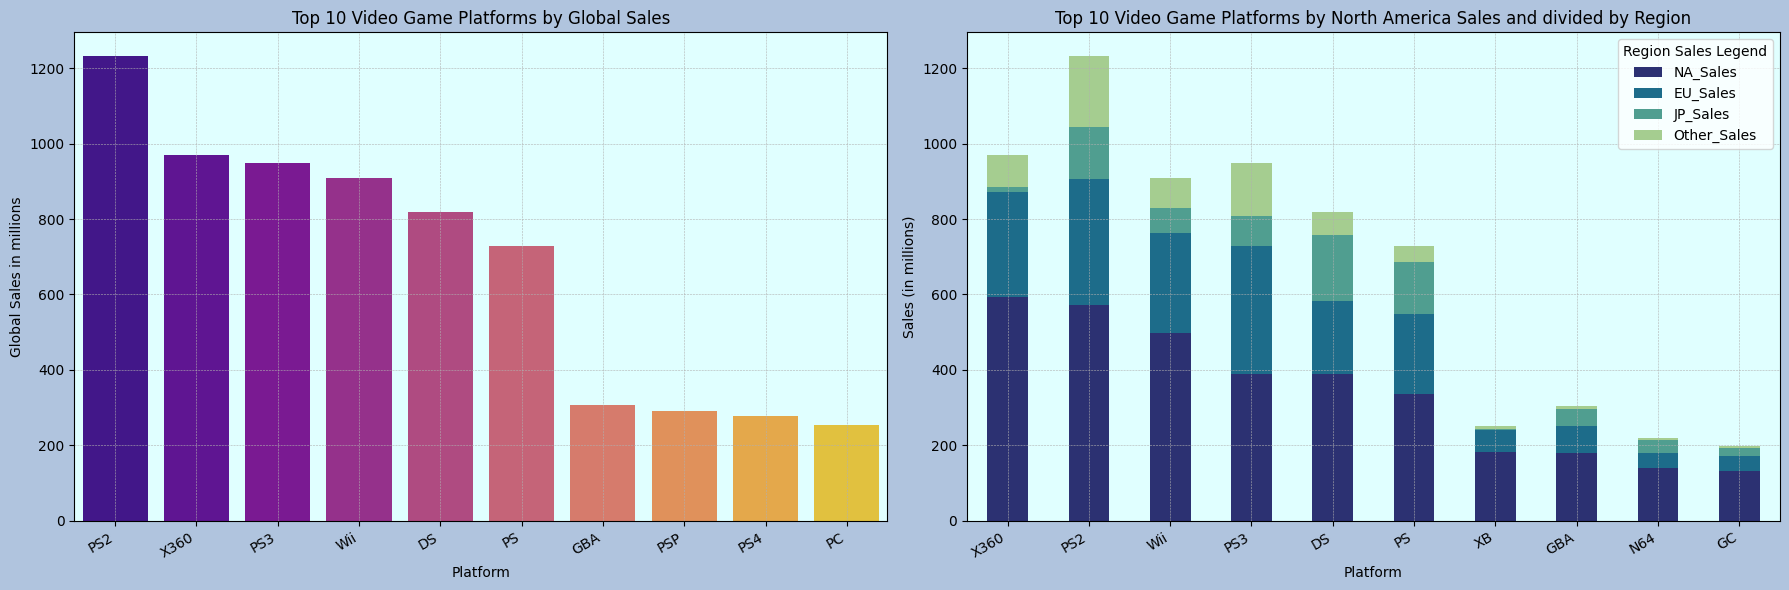

In [163]:
# Top Platform Analysis
top_platforms = df_cleaned.groupby('Platform')['Global_Sales'].sum().nlargest(10).reset_index()
top_platforms = top_platforms.sort_values(by='Global_Sales', ascending=False)

fig = plt.figure(figsize=(18, 6))
fig.patch.set_facecolor('lightsteelblue')
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Platform', y='Global_Sales', data=top_platforms, palette='plasma', ax=ax1)
ax1.set_title('Top 10 Video Game Platforms by Global Sales')
ax1.set_xlabel('Platform')
ax1.set_ylabel('Global Sales in millions')
ax1.set_xticklabels(top_platforms['Platform'], rotation=30, ha='right')
ax1.grid(axis='y', linestyle='--', linewidth=0.4)
ax1.grid(axis='x', linestyle='--', linewidth=0.4)
ax1.patch.set_facecolor('lightcyan')

# Creating a stacked bar plot for the top 10 platforms by North America and by region
stacked_platforms = df_cleaned.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().nlargest(10, 'NA_Sales')
stacked_platforms = stacked_platforms.sort_values(by='NA_Sales', ascending=False)
ax2 = plt.subplot(1, 2, 2)
stacked_platforms.plot(kind='bar', stacked=True, colormap='crest_r', ax=ax2)
ax2.set_title('Top 10 Video Game Platforms by North America Sales and divided by Region')
ax2.set_xlabel('Platform')
ax2.set_ylabel('Sales (in millions)')
ax2.set_xticklabels(stacked_platforms.index, rotation=30, ha='right')
ax2.legend(title='Region Sales Legend')
ax2.grid(axis='y', linestyle='--', linewidth=0.4)
ax2.grid(axis='x', linestyle='--', linewidth=0.4)
ax2.patch.set_facecolor('lightcyan')

plt.tight_layout()
plt.show()

In [164]:
# Creating a table of top 10 video game platforms by global sales with region sales
stacked_platforms["Global_Sales"] = stacked_platforms["NA_Sales"] + stacked_platforms["EU_Sales"] + stacked_platforms["JP_Sales"] + stacked_platforms["Other_Sales"]
stacked_platforms = stacked_platforms.sort_values(by='Global_Sales', ascending=False)
print("Table of top 10 video game platforms by global sales with region sales:")
stacked_platforms

Table of top 10 video game platforms by global sales with region sales:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56
X360,594.33,278.00,12.30,84.67,969.30
PS3,388.90,340.47,79.21,140.81,949.39
Wii,497.37,264.35,68.28,79.20,909.20
DS,388.53,194.05,175.02,60.29,817.89
PS,334.71,212.38,139.78,40.69,727.56
GBA,178.43,72.49,46.56,7.51,304.99
XB,182.06,59.65,1.38,8.48,251.57
N64,138.91,41.03,33.76,4.31,218.01


In [169]:
# Calculating the percentage of sales by region relative to global sales
stacked_platforms_percentage = stacked_platforms.div(stacked_platforms['Global_Sales'], axis=0) * 100
stacked_platforms_percentage['Global_Sales'] = 100
stacked_platforms_percentage = stacked_platforms_percentage.round(2)

# Formatting the percentage values for better readability
for col in stacked_platforms_percentage.columns:
    stacked_platforms_percentage[col] = stacked_platforms_percentage[col].astype(str) + '%'
print("Table of top 10 video game platforms by global sales with region sales by percentage:")
stacked_platforms_percentage


Table of top 10 video game platforms by global sales with region sales by percentage:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,46.44%,26.97%,11.15%,15.44%,100%
X360,61.32%,28.68%,1.27%,8.74%,100%
PS3,40.96%,35.86%,8.34%,14.83%,100%
Wii,54.7%,29.08%,7.51%,8.71%,100%
DS,47.5%,23.73%,21.4%,7.37%,100%
PS,46.0%,29.19%,19.21%,5.59%,100%
GBA,58.5%,23.77%,15.27%,2.46%,100%
XB,72.37%,23.71%,0.55%,3.37%,100%
N64,63.72%,18.82%,15.49%,1.98%,100%
